# Pré-Processmento

- Carregamento dos dados

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [5]:
var_path =  'C:/Users/luizf/OneDrive/Área de Trabalho/Workspace FIAP/Projetos-Fiap/challenge_ibm/sprint_2/análise_exploratoria/base_de_dades/brazilian-ecommerce/versions/2/'

df_items = pd.read_csv(var_path + 'olist_order_items_dataset.csv')
df_reviews = pd.read_csv(var_path + 'olist_order_reviews_dataset.csv')
df_orders = pd.read_csv(var_path + 'olist_orders_dataset.csv')
df_products = pd.read_csv(var_path + 'olist_products_dataset.csv')
df_geolocation = pd.read_csv(var_path + 'olist_geolocation_dataset.csv')
df_sellers = pd.read_csv(var_path + 'olist_sellers_dataset.csv')
df_payments = pd.read_csv(var_path + 'olist_order_payments_dataset.csv')
df_customers = pd.read_csv(var_path + 'olist_customers_dataset.csv')
df_category = pd.read_csv(var_path + 'product_category_name_translation.csv')

In [6]:
df = df_orders.merge(df_items, on='order_id', how='inner')
df = df.merge(df_payments, on='order_id', how='inner', validate='m:m')
df = df.merge(df_reviews, on='order_id', how='inner')
df = df.merge(df_products, on='product_id', how='inner')
df = df.merge(df_customers, on='customer_id', how='inner')
df = df.merge(df_sellers, on='seller_id', how='inner')

- Tratamento de dados

In [7]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
# Tratando casos
trocas = {
    1 : "Péssimo",
    2 : "Abixo da média",
    3 : "Na média",
    4 : "Acima da média",
    5 : "Ótimo"
}

# Realizando a troca dos campos
df_reviews['review_score_trat'] = df_reviews['review_score'].map(trocas)

In [9]:
# Tratando casos
trocas = {
    1 : "negativo",
    2 : "negativo",
    3 : "neutro",
    4 : "positivo",
    5 : "positivo"
}

# Realizando a troca dos campos
df_reviews['sentimento'] = df_reviews['review_score'].map(trocas)

# Análise Exploratória

In [10]:
total_ava = df_reviews.shape[0]
total_ava_null =df_reviews['review_comment_message'].isnull().sum()

print(f'Numero total de valiações: {total_ava} \nNumero total de avaliações SEM comentário: {total_ava_null} \n{(total_ava_null/total_ava) * 100:.2f}% das avaliações estão SEM comentário ')

Numero total de valiações: 99224 
Numero total de avaliações SEM comentário: 58247 
58.70% das avaliações estão SEM comentário 


- Separando os dados entre dados COM comentários e dados SEM comentários

In [11]:
df_ava_null_and_not_neutral = df_reviews[df_reviews['review_comment_message'].isnull()]
df_ava_not_null_and_not_neutral = df_reviews[(df_reviews['sentimento'].isin(['positivo','negativo','neutro'])) & (~(df_reviews['review_comment_message'].isnull())) ]

In [12]:
df_ava_null_and_not_neutral

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_trat,sentimento
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,Acima da média,positivo
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,Ótimo,positivo
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,Ótimo,positivo
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,Péssimo,negativo
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34,Ótimo,positivo
...,...,...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36,Ótimo,positivo
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57,Ótimo,positivo
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,Ótimo,positivo
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,Ótimo,positivo


In [13]:
# Comparando numero total de linhas com contagem de vaores nulos na coluna review_coment_message
df_ava_null_and_not_neutral.shape[0] == df_ava_null_and_not_neutral['review_comment_message'].isnull().sum()

np.True_

In [14]:
df_ava_not_null_and_not_neutral

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_score_trat,sentimento
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,Ótimo,positivo
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,Ótimo,positivo
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,Acima da média,positivo
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,Acima da média,positivo
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,Ótimo,positivo
...,...,...,...,...,...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,Acima da média,positivo
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,Ótimo,positivo
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06,Na média,neutro
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,Ótimo,positivo


Text(0.5, 1.0, 'Distribuição de SENTIMENTO referente às avaliações e que NÃO POSSUEM comentarios')

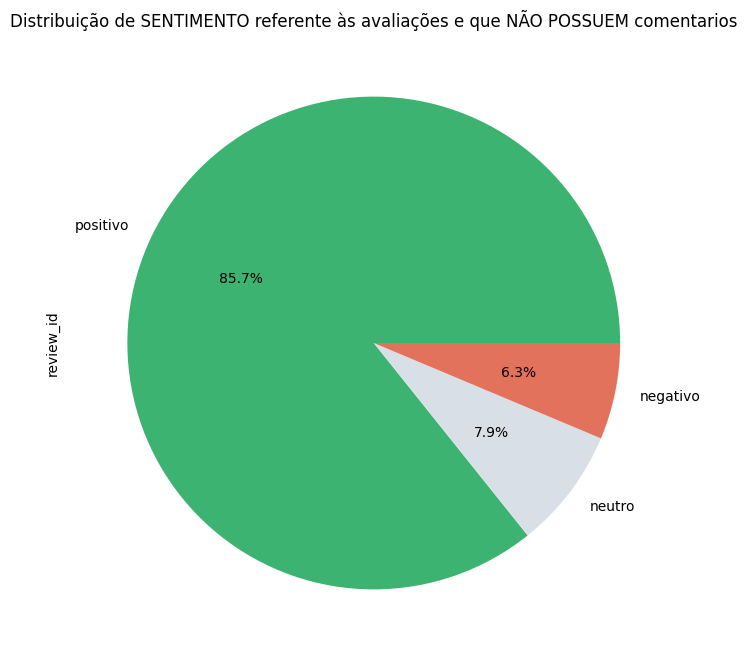

In [15]:
plt.figure(figsize=(8, 8))
cores = ['#3cb371', '#d8dfe7', '#e2725b']
# Example: Proportion of total sales by payment type
categorias_1 = df_ava_null_and_not_neutral.groupby([df_ava_null_and_not_neutral["sentimento"]])['review_id'].count().sort_values(ascending=False)
categorias_1.plot(kind='pie', colors = cores, autopct = '%1.1f%%')

plt.title("Distribuição de SENTIMENTO referente às avaliações e que NÃO POSSUEM comentarios")




Text(0.5, 1.0, 'Distribuição de SENTIMENTO referente às avaliações que POSSUEM comentários')

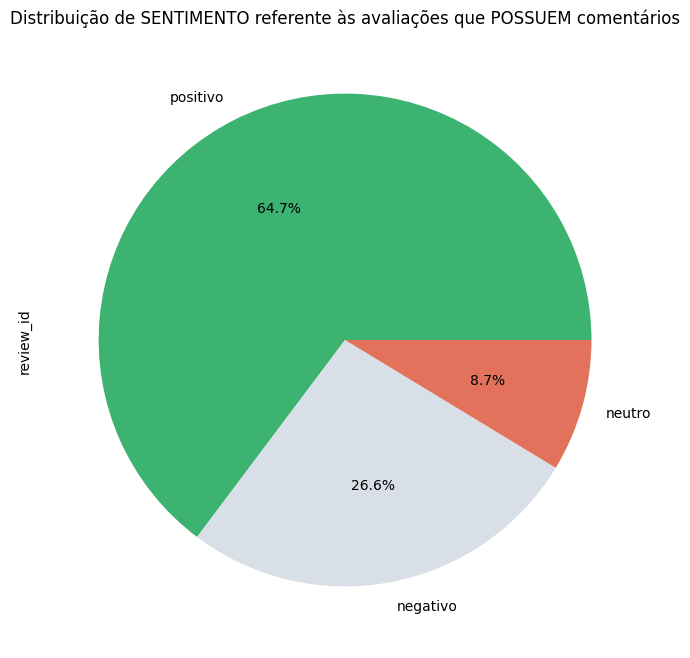

In [16]:
plt.figure(figsize=(8, 8))
cores = ['#3cb371', '#d8dfe7', '#e2725b']

# Example: Proportion of total sales by payment type
categorias_2 = df_ava_not_null_and_not_neutral.groupby([df_ava_not_null_and_not_neutral["sentimento"]])['review_id'].count().sort_values(ascending=False)
categorias_2.plot(kind='pie', colors = cores, autopct = '%1.1f%%')

plt.title("Distribuição de SENTIMENTO referente às avaliações que POSSUEM comentários")





Text(0.5, 1.0, 'Distribuição de SENTIMENTO referente à todas as avaliações')

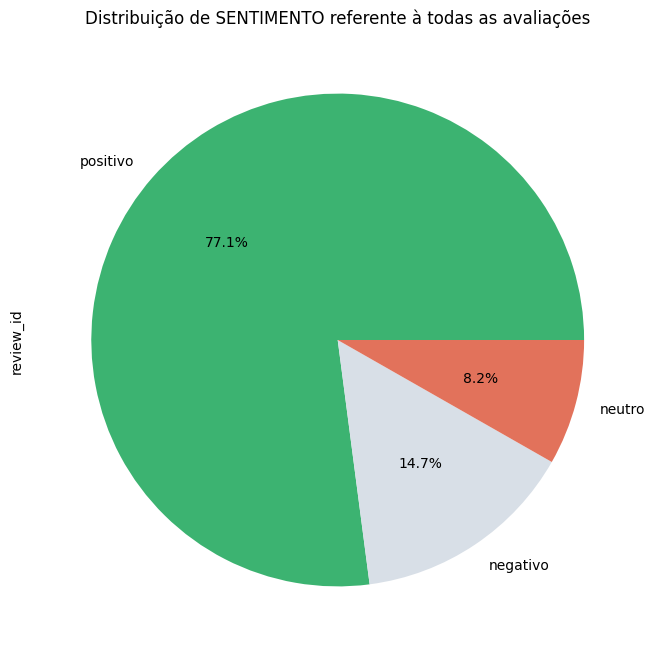

In [17]:
plt.figure(figsize=(8, 8))
cores = ['#3cb371', '#d8dfe7', '#e2725b']

# Example: Proportion of total sales by payment type
categorias_3 = df_reviews.groupby([df_reviews["sentimento"]])['review_id'].count().sort_values(ascending=False)
categorias_3.plot(kind='pie', colors = cores, autopct = '%1.1f%%')

plt.title("Distribuição de SENTIMENTO referente à todas as avaliações")


In [18]:
print("Distribuição de dados SOMENTE SEM comentarios")
categorias_1

Distribuição de dados SOMENTE SEM comentarios


sentimento
positivo    49940
neutro       4622
negativo     3685
Name: review_id, dtype: int64

In [19]:
print("Distribuição de dados SOMENTE COM comentarios")
categorias_2

Distribuição de dados SOMENTE COM comentarios


sentimento
positivo    26530
negativo    10890
neutro       3557
Name: review_id, dtype: int64

In [20]:
print("Distribuição de dados COM e SEM comentarios")
categorias_3

Distribuição de dados COM e SEM comentarios


sentimento
positivo    76470
negativo    14575
neutro       8179
Name: review_id, dtype: int64

#### Conclusão da EDA

Amostras Geradas:
- dataframe 1: NÃO possuem comentários nulos e que NÃO são neutros;
- dataframe 2: POSSUEM APENAS comentarios nulos e NÃO neutros;

Próximos passos:
- A análise de sentimentos será aplicada no dataframe 1 pois possuem comentários NÃO nulos;
- A análise pretivida será aplicada no dataframe 1 e 2, MAS o treinamento será feito com o dataframe 1;

Disclaimer:
- Nenhum dado neutro será utilizado por conta da sua baixa relevância no total de avaliações

# Algoritmos criados para a Análise de Sentimento
- Processamento de texto;
- Treinamento de Modelo de Machine Learning;
- Processamento de novas avaliaçoes;
- Algoritmo de Predição de Sentimento;

- Algoritmo de Treinamento de Machine Learning

In [21]:
def classificar_texto_tfidf_ngrams_md(df,feature_x, feature_y, num_features):
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    if num_features == 'None':
            tfidf = TfidfVectorizer(lowercase=False,ngram_range=(1,2))
    else:
            tfidf = TfidfVectorizer(lowercase=False,max_features=num_features, ngram_range=(1,2))


    vetor = tfidf.fit_transform(df[feature_x])
    
    from sklearn.model_selection import train_test_split

    x_treino, x_teste, y_treino, y_teste = train_test_split(vetor, df[feature_y], random_state=86957)
    
    from sklearn.linear_model import LogisticRegression
    
    modelo = LogisticRegression()

    modelo.fit(x_treino, y_treino)
    acuracia = modelo.score(x_teste, y_teste)

    pesos = pd.DataFrame(
        modelo.coef_[0].T,
        index= tfidf.get_feature_names_out()
    )
    msg = f"Dimensão vetor tfifd '{vetor.shape}' | Acurácia do modelo com a coluna '{feature_x}' e '{num_features}' features: {acuracia * 100:.2f}%"
    
    return pesos, msg, modelo, tfidf, vetor, acuracia

# Essa fuinção facilita o processo de classificação do texto, prevendo futuras avaliações



In [99]:
# Algoritmo de filtragem de stopwords

def filtro_stopword_alfanumerico_sem_acento_stemmer(df,nm_col_texto):
    from nltk import ngrams
    import unidecode
    from nltk import tokenize
    import nltk
    
    stemmer = nltk.RSLPStemmer() # instancia do stemmer
    sem_acento = [unidecode.unidecode(texto.lower()) for texto in df[nm_col_texto]] # Aplicando a uniformuzação do texto e removendo a acentuação da coluna antes da tokenização
    df[nm_col_texto] = sem_acento # Atruibuição da coluna sem acentuação
    palavras_irrelevantes =  nltk.corpus.stopwords.words('portuguese') # Definição das palavras irrelevantes da bilbioteca nlkt
    palavras_irrelevantes_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes] # Retirando a acentuacao das palavras irrelevantes
    palavras_processadas = [] # Lista vazia para armazenar o processamento da função
    token_pontuacao = tokenize.WordPunctTokenizer() # instancia do tokenizador que também separa em tokensm tudo que é alfánumérico incluíndo potuações

    for avaliacao in df[nm_col_texto]:
        token_palavras = token_pontuacao.tokenize(avaliacao) # Aplicação do tokem com base no espaço
        nova_frase = [stemmer.stem(palavra) for palavra in token_palavras if palavra.isalpha() and palavra not in palavras_irrelevantes_sem_acento] # sub-laço for filtrando as palavras que não devem estar processamento final e eliminando os caracteres alfanuméricos + redução pelo radical
        palavras_processadas.append(' '.join(nova_frase)) # Append das palavras processadas
    
    return palavras_processadas # Retorno dos dados processados

In [98]:
# Algoritmo de filtragem de stopwords

def filtro_stopword_alfanumerico_sem_acento(df,nm_col_texto):
    import unidecode
    from nltk import tokenize
    import nltk
    sem_acento = [unidecode.unidecode(texto.lower()) for texto in df[nm_col_texto]] # Aplicando a uniformuzação do texto e removendo a acentuação da coluna antes da tokenização
    df[nm_col_texto] = sem_acento # Atruibuição da coluna sem acentuação
    palavras_irrelevantes =  nltk.corpus.stopwords.words('portuguese') # Definição das palavras irrelevantes da bilbioteca nlkt
    palavras_irrelevantes_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes] # Retirando a acentuacao das palavras irrelevantes
    palavras_processadas = [] # Lista vazia para armazenar o processamento da função
    token_pontuacao = tokenize.WordPunctTokenizer() # instancia do tokenizador que também separa em tokensm tudo que é alfánumérico incluíndo potuações

    for avaliacao in df[nm_col_texto]:
        token_palavras = token_pontuacao.tokenize(avaliacao) # Aplicação do tokem com base no espaço
        nova_frase = [palavra for palavra in token_palavras if palavra.isalpha() and palavra not in palavras_irrelevantes_sem_acento] # sub-laço for filtrando as palavras que não devem estar processamento final e eliminando os caracteres alfanuméricos
        palavras_processadas.append(' '.join(nova_frase)) # Append das palavras processadas
    
    return palavras_processadas # Retorno dos dados processados

In [121]:
def processar_avaliacao(avaliacao):
  from nltk import ngrams
  import unidecode
  from nltk import tokenize
  import nltk
   

  palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
  token_pontuacao = tokenize.WordPunctTokenizer()
  stemmer = nltk.RSLPStemmer()
  
  # passo 1
  tokens = token_pontuacao.tokenize(avaliacao)

  # passo 2
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

  # passo 3
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

  # passo 4
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

  # passo 5
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

  return ' '.join(frase_processada)

In [127]:
def predicao_de_sentimento(list, str_vector, str_modelo_treinado):

    # Carregamento do modelo e vetorizador

    import joblib

    tfidf = joblib.load(str_vector)
    regresssao_logisticaa = joblib.load(str_modelo_treinado)

    # captura das novas avaliações

    novas_avaliacoes = list

    # Processamento de Novas Avaliações

    novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

    # Vetorização das palavras para predição

    novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

    # Execução do modelo de Machine Learning;

    predicoes = regresssao_logisticaa.predict(novas_avaliacoes_tfidf)

    # Geração e retorno de dados  com o índice do dataframe das avaliações cattegadas

    df_previsoes = pd.DataFrame({
        'Avaliação': novas_avaliacoes, #indice de um datraframme filtrado
        'Sentimento previsto': predicoes
    })

    return df_previsoes

In [116]:
# Algoritmo de geração de wordcloud

def nuvem_palavras(dados,col_texto,sentimento):
    from wordcloud import WordCloud
    texto_sentimento = dados.query(f"sentimento == '{sentimento}'")[col_texto]

    texto_unido = ''.join(texto_sentimento)

    nuvem_palavras = WordCloud(width=800, height=500,max_font_size=110, collocations=False).generate(texto_unido)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show

# Processamento de texto

In [25]:
df_ava_null_and_not_neutral = df_reviews[df_reviews['review_comment_message'].isnull()]
df_ava_not_null = df_reviews[(df_reviews['sentimento'].isin(['positivo','negativo','neutro'])) & (~(df_reviews['review_comment_message'].isnull())) ]
df_ava_not_null_and_not_neutral = df_reviews[(df_reviews['sentimento'].isin(['positivo','negativo'])) & (~(df_reviews['review_comment_message'].isnull())) ]


In [26]:
df_ava_not_null_and_not_neutral.count()

review_id                  37420
order_id                   37420
review_score               37420
review_comment_title        9102
review_comment_message     37420
review_creation_date       37420
review_answer_timestamp    37420
review_score_trat          37420
sentimento                 37420
dtype: int64

### Dados com comentarios positivos, negativos e neutros selecionados para processamento de texto

In [55]:
df_avaliacoes = df_ava_not_null[['review_comment_message', 'sentimento']]


In [57]:
df_avaliacoes['tratamento'] = filtro_stopword_alfanumerico_sem_acento_stemmer(df_avaliacoes,'review_comment_message')

C:\Users\luizf\AppData\Local\Temp\ipykernel_33660\2114206035.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nm_col_texto] = sem_acento # Atruibuição da coluna sem acentuação
C:\Users\luizf\AppData\Local\Temp\ipykernel_33660\1002624054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avaliacoes['tratamento'] = filtro_stopword_alfanumerico_sem_acento_stemmer(df_avaliacoes,'review_comment_message')


In [100]:
df_avaliacoes['tratamento_sem_radical'] = filtro_stopword_alfanumerico_sem_acento(df_avaliacoes, 'review_comment_message')

C:\Users\luizf\AppData\Local\Temp\ipykernel_33660\4242066894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nm_col_texto] = sem_acento # Atruibuição da coluna sem acentuação
C:\Users\luizf\AppData\Local\Temp\ipykernel_33660\3728316092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avaliacoes['tratamento_sem_radical'] = filtro_stopword_alfanumerico_sem_acento(df_avaliacoes, 'review_comment_message')


In [105]:
df_avaliacoes

,review_comment_message,sentimento,tratamento,tratamento_sem_radical
3,recebi bem antes do prazo estipulado.,positivo,receb bem ant praz estipul,recebi bem antes prazo estipulado
4,parabens lojas lannister adorei comprar pela i...,positivo,parab loj lannist ador compr internet segur pr...,parabens lojas lannister adorei comprar intern...
9,aparelho eficiente. no site a marca do aparelh...,positivo,aparelh efici sit marc aparelh impress cheg ou...,aparelho eficiente site marca aparelho impress...
12,"mas um pouco ,travando...pelo valor ta boa.\r\n",positivo,pouc trav val ta boa,pouco travando valor ta boa
15,"vendedor confiavel, produto ok e entrega antes...",positivo,vend confia produt ok entreg ant praz,vendedor confiavel produto ok entrega antes prazo
...,...,...,...,...
99205,para este produto recebi de acordo com a compr...,positivo,produt receb acord compr realiz,produto recebi acordo compra realizada
99208,entregou dentro do prazo. o produto chegou em ...,positivo,entreg dentr praz produt cheg condico perfeit ...,entregou dentro prazo produto chegou condicoes...
99215,"o produto nao foi enviado com nf, nao existe v...",neutro,produt envi nf exist vend nf cert fic aguard e...,produto enviado nf existe venda nf certeza fic...
99221,"excelente mochila, entrega super rapida. super...",positivo,excel mochil entreg sup rap sup recom loj,excelente mochila entrega super rapida super r...


### Dados sem comentários neutros selecionados para processamento de texto

In [30]:
df_avaliacoes_sem_neutros = df_ava_not_null_and_not_neutral[['review_comment_message','sentimento']]

In [31]:
df_avaliacoes_sem_neutros.groupby('sentimento')['sentimento'].count()

sentimento
negativo    10890
positivo    26530
Name: sentimento, dtype: int64

In [32]:
df_avaliacoes_sem_neutros['tratamento'] = filtro_stopword_alfanumerico_sem_acento_stemmer(df_avaliacoes,'review_comment_message')

C:\Users\luizf\AppData\Local\Temp\ipykernel_33660\2114206035.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nm_col_texto] = sem_acento # Atruibuição da coluna sem acentuação
C:\Users\luizf\AppData\Local\Temp\ipykernel_33660\4027291656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avaliacoes_sem_neutros['tratamento'] = filtro_stopword_alfanumerico_sem_acento_stemmer(df_avaliacoes,'review_comment_message')


In [103]:
df_avaliacoes_sem_neutros['tratamento_sem_radical'] = filtro_stopword_alfanumerico_sem_acento(df_avaliacoes_sem_neutros, 'review_comment_message')

C:\Users\luizf\AppData\Local\Temp\ipykernel_33660\4242066894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nm_col_texto] = sem_acento # Atruibuição da coluna sem acentuação
C:\Users\luizf\AppData\Local\Temp\ipykernel_33660\1544938982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avaliacoes_sem_neutros['tratamento_sem_radical'] = filtro_stopword_alfanumerico_sem_acento(df_avaliacoes_sem_neutros, 'review_comment_message')


In [104]:
df_avaliacoes_sem_neutros

,review_comment_message,sentimento,tratamento,tratamento_sem_radical
3,recebi bem antes do prazo estipulado.,positivo,receb bem ant praz estipul,recebi bem antes prazo estipulado
4,parabens lojas lannister adorei comprar pela i...,positivo,parab loj lannist ador compr internet segur pr...,parabens lojas lannister adorei comprar intern...
9,aparelho eficiente. no site a marca do aparelh...,positivo,aparelh efici sit marc aparelh impress cheg ou...,aparelho eficiente site marca aparelho impress...
12,"mas um pouco ,travando...pelo valor ta boa.\r\n",positivo,pouc trav val ta boa,pouco travando valor ta boa
15,"vendedor confiavel, produto ok e entrega antes...",positivo,vend confia produt ok entreg ant praz,vendedor confiavel produto ok entrega antes prazo
...,...,...,...,...
99203,tive um problema na entrega em que o correio c...,negativo,problem entreg correi coloc sit entreg dia ent...,problema entrega correio colocou site entregue...
99205,para este produto recebi de acordo com a compr...,positivo,produt receb acord compr realiz,produto recebi acordo compra realizada
99208,entregou dentro do prazo. o produto chegou em ...,positivo,entreg dentr praz produt cheg condico perfeit ...,entregou dentro prazo produto chegou condicoes...
99221,"excelente mochila, entrega super rapida. super...",positivo,excel mochil entreg sup rap sup recom loj,excelente mochila entrega super rapida super r...


# Treinamento do Modelo de Regressão Logística

- Treinamento do modelo_0 utilizando a coluna de comentários sem nenhum processamento de texto

A vertorização do TFIDF pode escalar de maneira horizontal o que aumenta a dimensão do vetor. A acurácia do modelo pode ser influênciada conforme aumentamos a quantidade de features;
Inicialmente, temos um teste com um número inicial de features igual a 20:

In [59]:
df_pesos, msg, modelo_treinado_0, tfidf, vetor, acuracia = classificar_texto_tfidf_ngrams_md(df_avaliacoes,'review_comment_message','sentimento',20)

In [60]:
resultados_modelo = pd.DataFrame(columns=['num_features','dimensao_vetor','acuracia_modelo','mensagem'])

In [61]:
max_features_init = 20
for i in range(1,10):
    num_features = max_features_init*i
    df_pesos, msg, modelo_treinado, tfidf, vetor, acuracia = classificar_texto_tfidf_ngrams_md(df_avaliacoes,'review_comment_message','sentimento', num_features)

    resultados_modelo.loc[len(resultados_modelo)] = [
                                                        num_features,
                                                        vetor.shape,
                                                        acuracia,
                                                        msg
                                                    ]

In [62]:
max_features_init = 1620
for i in range(1,10):
    num_features = max_features_init*i
    df_pesos, msg, modelo_treinado, tfidf, vetor, acuracia = classificar_texto_tfidf_ngrams_md(df_avaliacoes,'review_comment_message','sentimento', num_features)

    resultados_modelo.loc[len(resultados_modelo)] = [
                                                        num_features,
                                                        vetor.shape,
                                                        acuracia,
                                                        msg
                                                    ]

In [63]:
resultados_modelo

,num_features,dimensao_vetor,acuracia_modelo,mensagem
0,20,"(40977, 20)",0.787018,"Dimensão vetor tfifd '(40977, 20)' | Acurácia ..."
1,40,"(40977, 40)",0.803416,"Dimensão vetor tfifd '(40977, 40)' | Acurácia ..."
2,60,"(40977, 60)",0.812396,"Dimensão vetor tfifd '(40977, 60)' | Acurácia ..."
3,80,"(40977, 80)",0.817960,"Dimensão vetor tfifd '(40977, 80)' | Acurácia ..."
4,100,"(40977, 100)",0.821669,"Dimensão vetor tfifd '(40977, 100)' | Acurácia..."
5,120,"(40977, 120)",0.827135,"Dimensão vetor tfifd '(40977, 120)' | Acurácia..."
6,140,"(40977, 140)",0.830161,"Dimensão vetor tfifd '(40977, 140)' | Acurácia..."
7,160,"(40977, 160)",0.832796,"Dimensão vetor tfifd '(40977, 160)' | Acurácia..."
8,180,"(40977, 180)",0.834261,"Dimensão vetor tfifd '(40977, 180)' | Acurácia..."
9,1620,"(40977, 1620)",0.854661,"Dimensão vetor tfifd '(40977, 1620)' | Acuráci..."


num_features       14580.00000
acuracia_modelo        0.85876
media                900.00000
dtype: float64

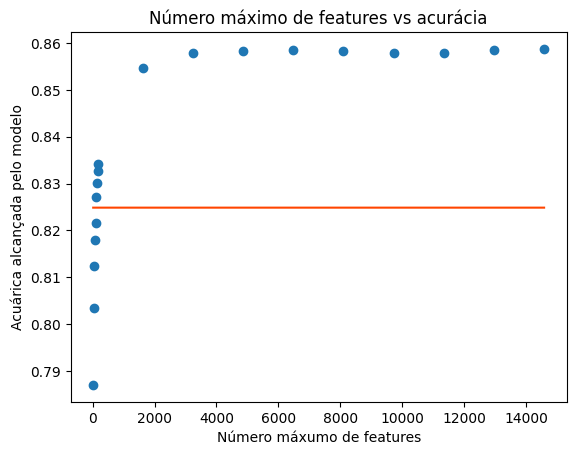

In [64]:
eixo_x = resultados_modelo['num_features']
eixo_y = resultados_modelo['acuracia_modelo']

plt.scatter(eixo_x,eixo_y)
plt.title('Número máximo de features vs acurácia')
plt.xlabel('Número máxumo de features')
plt.ylabel('Acuárica alcançada pelo modelo')


coef = np.polyfit(eixo_x,eixo_y,1)
tend = np.poly1d(coef)
plt.plot(eixo_x,tend(eixo_y), color="#FF4500", label="Tendência")


aux = resultados_modelo[['num_features','acuracia_modelo']].max()
aux['media'] = resultados_modelo['num_features'].median()
aux


- Acurácia obtida com um número máximo de features igual a 8000, que está dentro da variância aceitavel

### Treinamento realizado consideranto sentimentos como: positivo, negativo, netro

In [65]:
df_pesos, msg, modelo_treinado_1, tfidf, vetor, acuracia = classificar_texto_tfidf_ngrams_md(df_avaliacoes,'tratamento','sentimento',8000)
print(msg)

Dimensão vetor tfifd '(40977, 8000)' | Acurácia do modelo com a coluna 'tratamento' e '8000' features: 84.84%


- Treinamento do modelo com todas as features disponíveis

In [66]:
df_pesos_3, msg, modelo_treinado_3, tfidf_3, vetor_3, acuracia = classificar_texto_tfidf_ngrams_md(df_avaliacoes,'tratamento','sentimento','None')
print(msg)

Dimensão vetor tfifd '(40977, 93662)' | Acurácia do modelo com a coluna 'tratamento' e 'None' features: 84.95%


- Após alguns testes, foi observado que a acurácia tende a estagnar a partir de um numero máximo de features igual a 2000
- Para fins de otimização de processamento, podemos definir a melhor acurácia obtida pelo modelo a partir de 8000 features como valor máximo que é oteto obtido pela análise;
- E mesmo utilizando todas as features disponíveis no vetorizador, vemos uma acurácia 84.51% que não melhora tanto que não possui ganho significativo nessa métrica;

### Treinamento realizado desconsiderando os comentários neutros

In [67]:
df_pesos_4, msg, modelo_treinado_4, tfidf_4, vetor_4, acuracia = classificar_texto_tfidf_ngrams_md(df_avaliacoes_sem_neutros,'tratamento','sentimento',8000)
print(msg)

Dimensão vetor tfifd '(37420, 8000)' | Acurácia do modelo com a coluna 'tratamento' e '8000' features: 92.03%


In [68]:
df_pesos_5, msg, modelo_treinado_5, tfidf_5, vetor_5, acuracia = classificar_texto_tfidf_ngrams_md(df_avaliacoes_sem_neutros,'tratamento','sentimento','None')
print(msg)

Dimensão vetor tfifd '(37420, 84141)' | Acurácia do modelo com a coluna 'tratamento' e 'None' features: 91.75%


- Tivemos uma melhora na acurácia do modelo assim que eliminamos as quantidades de valores possíveis para a variável y;
- A melhor performance foi obtida considerando um teto de 8000 features como numero máximo se for comparada com número total de features disponíveis;

# Serialização de Modelo e Vetorizador

In [69]:
import joblib

joblib.dump(tfidf_4, 'tfidf_vector_3_val_y_v2.plk')
joblib.dump(modelo_treinado_4, 'md_reg_log_3_val_para_y_v2.plk')

joblib.dump(tfidf_5, 'tfidf_vector_2_val_y_v2.plk')
joblib.dump(modelo_treinado_5, 'md_reg_log_2_val_para_y_v2.plk')

['md_reg_log_2_val_para_y_v2.plk']

# Análises finais

- Análise de Palavras Mais Relevantes

### WordCloud com palavras reduzidas ao seu radical

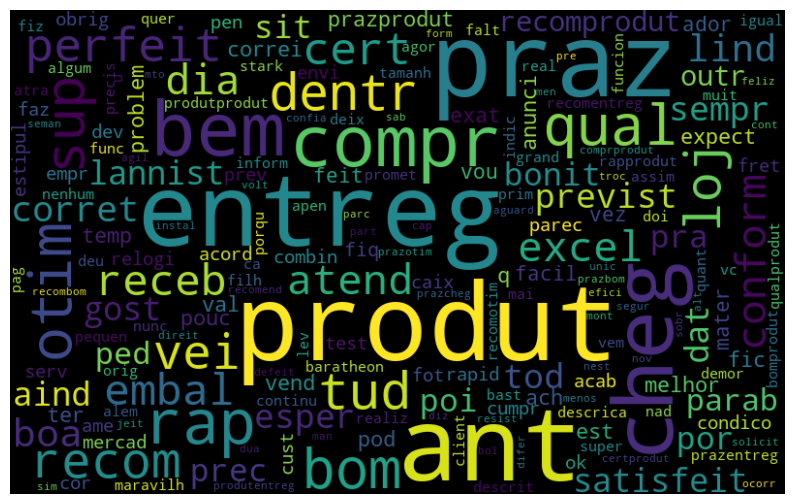

In [84]:
nuvem_palavras(df_avaliacoes_sem_neutros,'tratamento','positivo')

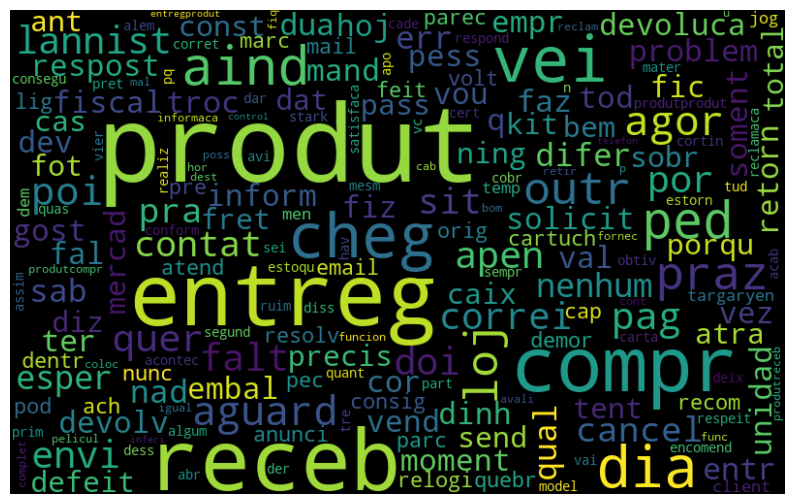

In [88]:
nuvem_palavras(df_avaliacoes_sem_neutros,'tratamento','negativo')

### WordCloud sem palavras reduzidas ao seu radical

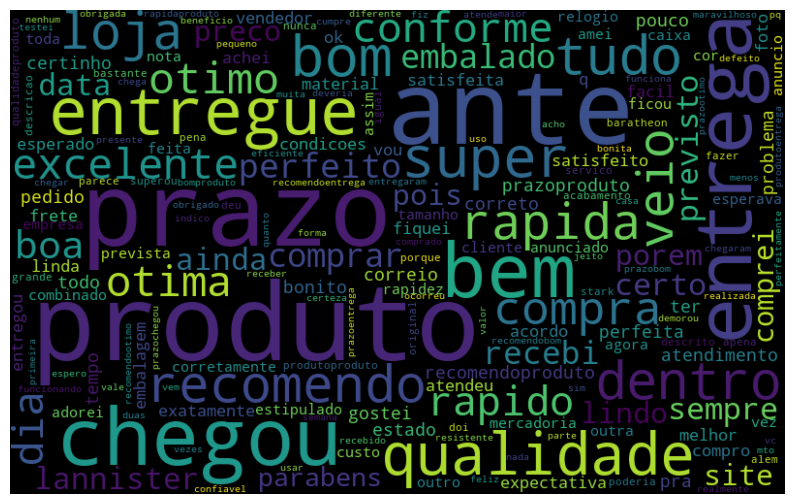

In [114]:
nuvem_palavras(df_avaliacoes_sem_neutros,'tratamento_sem_radical','positivo')

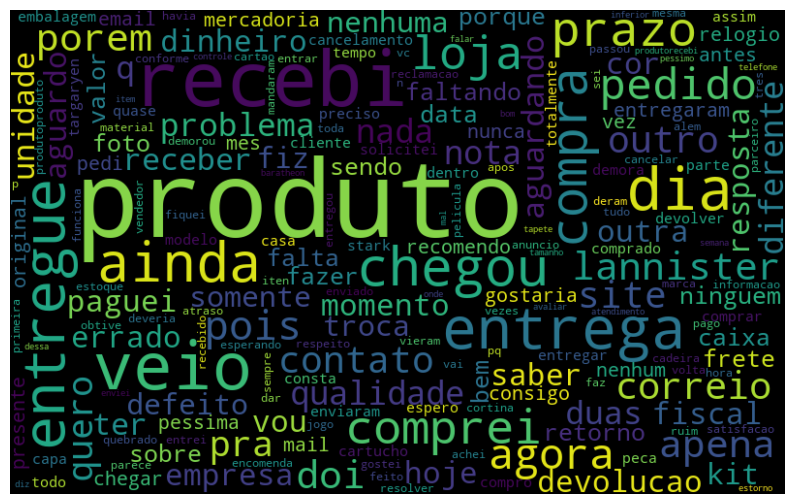

In [111]:
nuvem_palavras(df_avaliacoes_sem_neutros,'tratamento_sem_radical','negativo')

### Análise de frequência de Palavras

In [95]:
def grafico_frequencia(df,nm_col_ava,sentimento,qty):
    import matplotlib.pyplot as plt
    import seaborn as sns
    from nltk import tokenize
    import nltk

    df = df[df['sentimento'] == sentimento]

    token_espaco = tokenize.WhitespaceTokenizer()
    todas_palavras = ' '.join([texto for texto in df[nm_col_ava]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)

    df_frequencia = pd.DataFrame({'palavra':list(frequencia.keys()),
                              'frequencia':list(frequencia.values())})
    
    plt.figure(figsize=(20,6))
    ax = sns.barplot(df_frequencia.nlargest(columns='frequencia',n=qty), x='palavra', y='frequencia',color='grey')
    ax.set(ylabel='Contagem')


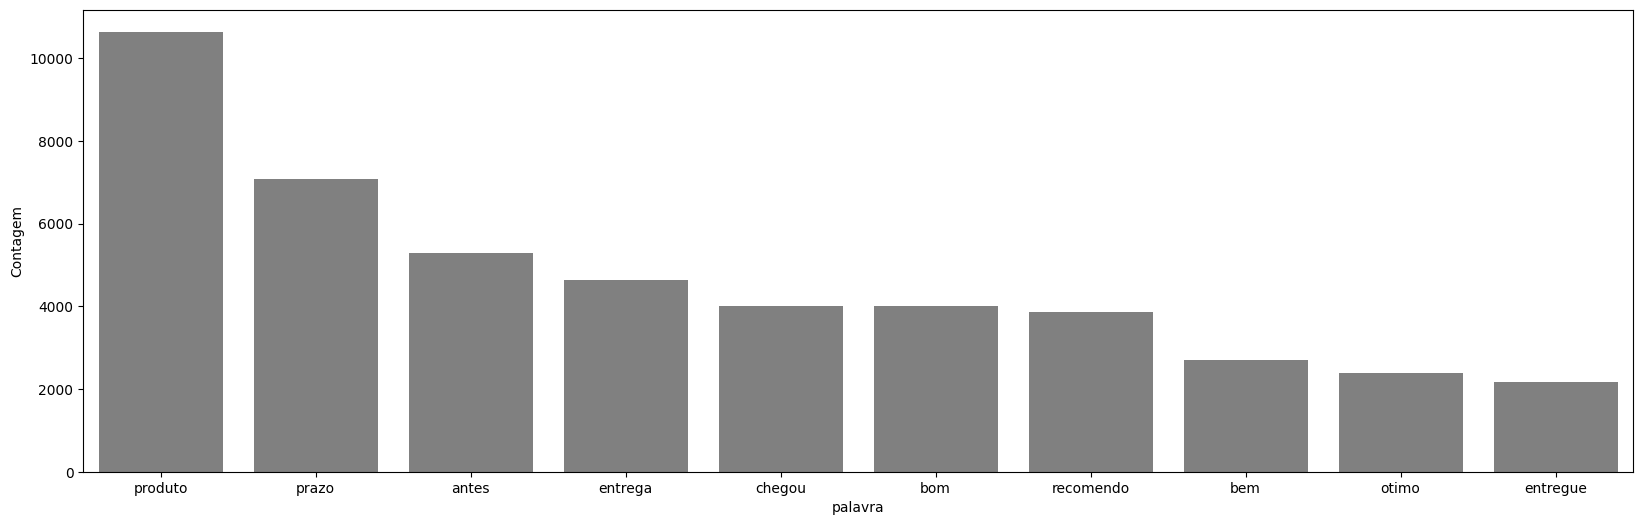

In [118]:
grafico_frequencia(df_avaliacoes_sem_neutros,'tratamento_sem_radical', "positivo",10)

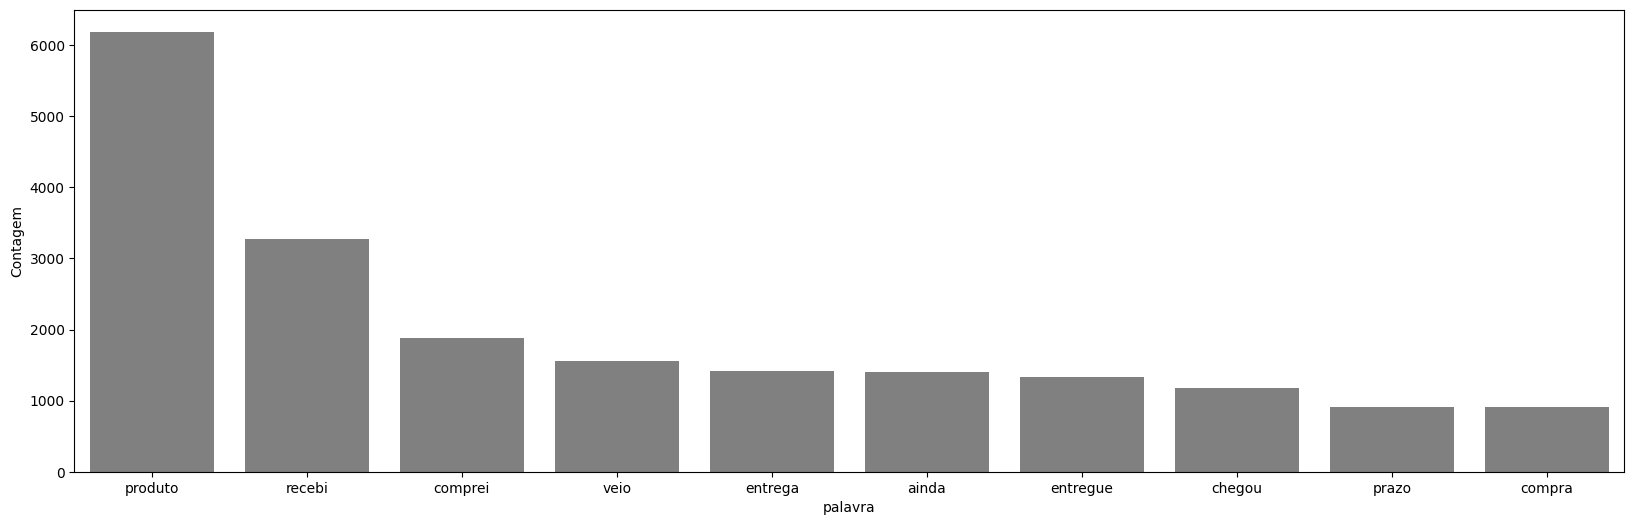

In [119]:
grafico_frequencia(df_avaliacoes_sem_neutros,'tratamento_sem_radical', "negativo",10)

### Análise preditiva de sentimentos

In [120]:
novas_ava = ["Excelente atendimento, voltarei com certeza!", 
            "Muito lento, não recomendo.", 
            "Gostei bastante da qualidade do produto.", 
            "A entrega atrasou demais, fiquei decepcionado.", 
            "Superou minhas expectativas!", 
            "Atendimento confuso e demorado.", 
            "Produto bem embalado e funcionando perfeitamente.", 
            "Veio com defeito, tive que trocar.", 
            "Nota 10 para o suporte técnico!", 
            "Não gostei da experiência de compra.", 
            "Fácil de usar, intuitivo e bonito.", 
            "Difícil de instalar, não explicaram direito.", 
            "Tudo certo do início ao fim.", 
            "Chegou quebrado, infelizmente.", 
            "Excelente custo-benefício.", 
            "Não funcionou como prometido.", 
            "Recomendo! Atendimento muito bom.", 
            "Achei caro e pouco eficiente.", 
            "Rápido, prático e eficiente!", 
            "Demoraram pra responder, perdi a paciência."
]

In [129]:
novas_ava_mktpl = [ 
                    "Produto de ótima qualidade, exatamente como descrito!",
                    "Veio com arranhões e embalagem danificada.",
                    "Excelente custo-benefício, super recomendo.",
                    "Não corresponde ao que foi anunciado.",
                    "Chegou antes do prazo, muito satisfeito com a compra.",
                    "Material frágil, quebrou com poucos usos.",
                    "Produto original e bem embalado.",
                    "A cor é diferente da foto, fiquei decepcionado.",
                    "Funcionando perfeitamente, atende minhas necessidades.",
                    "Demorou muito para ser entregue e veio com defeito.",
                    "Fácil de montar, manual bem explicado.",
                    "O tamanho não corresponde ao informado.",
                    "Superou minhas expectativas, voltarei a comprar com o vendedor.",
                    "Produto de baixa qualidade, não vale o preço.",
                    "Entrega rápida e produto bem protegido.",
                    "A caixa veio amassada e o produto com defeito.",
                    "Ótimo acabamento e muito bonito, exatamente como esperava.",
                    "Chegou com peças faltando, péssima experiência.",
                    "Muito bom pelo preço, cumpre o que promete.",
                    "O produto é bonito, mas o desempenho deixou a desejar."
]

In [140]:
novas_ava_mktpl_especifica = ["O fone de ouvido chegou antes do prazo, com som limpo, graves potentes e já carregado. A embalagem era reforçada e bem protegida.",
"O aspirador parecia bom, mas veio sem um dos bocais e o manual estava todo em espanhol. Fiquei decepcionado com a experiência.",
"Comprei o kit de facas e fiquei surpreso com a qualidade do corte e o acabamento das lâminas. Produto bem acima do esperado pelo preço.",
"A cafeteira é muito bonita, mas não aquece direito e o café sai morno. Entrei em contato com o suporte e ainda não tive resposta.",
"O tênis chegou certinho, é confortável, tem um ótimo amortecimento e não machuca nos calcanhares. Uso ele até pra academia.",
"A blusa veio com uma costura mal feita na manga e cheia de fiapos. Claramente não teve controle de qualidade na peça.",
"Essa air fryer foi uma das melhores compras que fiz. Silenciosa, fácil de limpar, e os alimentos ficam prontos rapidinho.",
"Comprei uma luminária e a parte do botão já veio solta dentro da caixa. Parece que já foi usada antes. Péssimo controle do vendedor.",
"Mouse gamer super responsivo, iluminação RGB bonita e conexão estável. Instalação plug and play, sem dor de cabeça.",
"O celular veio com a caixa aberta e faltando o carregador. Fui enganado. Não recomendo essa loja.",
"A mochila é resistente, tem muitos compartimentos úteis, e o zíper é firme. Ideal pra levar pro trabalho ou faculdade.",
"A tela do monitor veio com um pixel queimado bem no meio. Solicitei troca, mas o vendedor não respondeu ainda.",
"O perfume veio lacrado, com nota fiscal, e o cheiro é fiel ao da loja física. A duração na pele é excelente também.",
"Os cabos de carregamento simplesmente não funcionam. Testei em três celulares diferentes e nenhum carregou.",
"O suporte de celular para carro é ótimo, prende bem e se adapta ao painel sem ficar balançando. Valeu cada centavo.",
"O teclado mecânico chegou sujo, com marcas de uso e uma tecla solta. Não parece novo, mesmo tendo sido vendido como tal.",
"A caixa de som Bluetooth tem grave forte, bateria que dura mais de 8 horas e ainda veio com bolsa de transporte. Muito top.",
"Comprei uma camiseta G e recebi uma P. Além disso, o tecido é super fino e parece que vai rasgar fácil.",
"Produto sensacional! O processador chegou lacrado, instalação tranquila, e já estou rodando tudo em alta performance.",
"O relógio veio com a pulseira invertida e sem proteção na tela. Não condiz com as fotos do anúncio."
]

In [128]:
processada = [processar_avaliacao(avaliacao) for avaliacao in novas_ava_mktpl]
processada

['produt otim qual exat descrit',
 'vei arranho embal danific',
 'excel cust benefici sup recom',
 'correspond anunci',
 'cheg ant praz satisfeit compr',
 'mater fragil quebr pouc uso',
 'produt orig bem embal',
 'cor difer fot fiq decepcion',
 'funcion perfeit atend necess',
 'demor entreg vei defeit',
 'facil mont man bem explic',
 'tamanh correspond inform',
 'super expect volt compr vend',
 'produt baix qual val prec',
 'entreg rap produt bem proteg',
 'caix vei amass produt defeit',
 'otim acab bonit exat esper',
 'cheg pec falt pess experienc',
 'bom prec cumpr promet',
 'produt bonit desempenh deix desej']

In [ ]:
predicao_de_sentimento(novas_ava_mktpl,'tfidf_vector_2_val_y_v2.plk','md_reg_log_2_val_para_y_v2.plk')

,Avaliação,Sentimento previsto
0,"Produto de ótima qualidade, exatamente como de...",positivo
1,Veio com arranhões e embalagem danificada.,negativo
2,"Excelente custo-benefício, super recomendo.",positivo
3,Não corresponde ao que foi anunciado.,positivo
4,"Chegou antes do prazo, muito satisfeito com a ...",positivo
5,"Material frágil, quebrou com poucos usos.",positivo
6,Produto original e bem embalado.,positivo
7,"A cor é diferente da foto, fiquei decepcionado.",negativo
8,"Funcionando perfeitamente, atende minhas neces...",positivo
9,Demorou muito para ser entregue e veio com def...,negativo


In [139]:
predicao_de_sentimento(novas_ava_mktpl,'tfidf_vector_2_val_y_v2.plk','md_reg_log_2_val_para_y_v2.plk')

,Avaliação,Sentimento previsto
0,"Produto de ótima qualidade, exatamente como de...",positivo
1,Veio com arranhões e embalagem danificada.,negativo
2,"Excelente custo-benefício, super recomendo.",positivo
3,Não corresponde ao que foi anunciado.,positivo
4,"Chegou antes do prazo, muito satisfeito com a ...",positivo
5,"Material frágil, quebrou com poucos usos.",positivo
6,Produto original e bem embalado.,positivo
7,"A cor é diferente da foto, fiquei decepcionado.",negativo
8,"Funcionando perfeitamente, atende minhas neces...",positivo
9,Demorou muito para ser entregue e veio com def...,negativo


In [141]:
predicao_de_sentimento(novas_ava_mktpl_especifica,'tfidf_vector_2_val_y_v2.plk','md_reg_log_2_val_para_y_v2.plk')

,Avaliação,Sentimento previsto
0,"O fone de ouvido chegou antes do prazo, com so...",positivo
1,"O aspirador parecia bom, mas veio sem um dos b...",positivo
2,Comprei o kit de facas e fiquei surpreso com a...,positivo
3,"A cafeteira é muito bonita, mas não aquece dir...",negativo
4,"O tênis chegou certinho, é confortável, tem um...",positivo
5,A blusa veio com uma costura mal feita na mang...,negativo
6,Essa air fryer foi uma das melhores compras qu...,positivo
7,Comprei uma luminária e a parte do botão já ve...,negativo
8,"Mouse gamer super responsivo, iluminação RGB b...",positivo
9,O celular veio com a caixa aberta e faltando o...,negativo


In [142]:
predicao_de_sentimento(novas_ava,'tfidf_vector_2_val_y_v2.plk','md_reg_log_2_val_para_y_v2.plk')

,Avaliação,Sentimento previsto
0,"Excelente atendimento, voltarei com certeza!",positivo
1,"Muito lento, não recomendo.",positivo
2,Gostei bastante da qualidade do produto.,positivo
3,"A entrega atrasou demais, fiquei decepcionado.",negativo
4,Superou minhas expectativas!,positivo
5,Atendimento confuso e demorado.,positivo
6,Produto bem embalado e funcionando perfeitamente.,positivo
7,"Veio com defeito, tive que trocar.",negativo
8,Nota 10 para o suporte técnico!,positivo
9,Não gostei da experiência de compra.,positivo
